In [2]:
graphics_toolkit("gnuplot"); % this line is needed only in Octave

## Řešení 1d úlohy s reaktivním členem pomocí Galerkinovy metody s polynomiální bází

Úkolem je vyřešit následující okrajovou úlohu pomocí Galerkinovy metody s polynomiální bází. Tuto úlohu umíme řešit i analyticky a již jsme ji řešili také metodou konečných diferencí. Toto řešení tedy můžete porovnat s dříve získanými. 

In [8]:
% plot of the numerical solution
%   -k*u''(x)+k0*u(x)=g
%   u(0)=U
%   -k*u'(l)=T

Nastavení všech parametrů výše specifikované úlohy. <br> Začněte nejprve s těmito parametry a až úkol dokončíte, zkuste provádět jejich změny a zkoumat vliv na řešení úlohy.

In [9]:
k=1;
k0=1; 
L=10;
f=0; Uhat=1; g=f+k0*Uhat;
U=0;
T=-1;

Můžeme použít polynomiální bázi o libovolné velikosti. Pro jednoduchost začneme bází $ \{ 1,x,x^2,x^3 \} $. Konstantní polynom použijeme k "zakódování" Dirichletovy okrajové podmínky. Výsledná soustava tedy bude mít velikost $3 \times 3$. <br>
Hledáme tedy řešení ve tvaru
$ U+\alpha_1 \cdot x + \alpha_2 \cdot x^2 + \alpha_3 \cdot x^3 $.

   6.8820e-01
  -1.4584e-01
   9.6623e-03


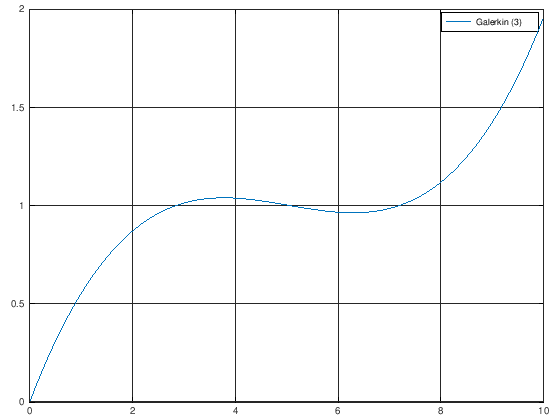

In [18]:
% Galerkin method with polynomial basis up to x^3
A=[ k*L+k0*L^3/3         k*L^2+k0*L^4/4       k*L^3+k0*L^5/5
    k*L^2+k0*L^4/4       4/3*k*L^3+k0*L^5/5   3/2*k*L^4+k0*L^6/6
    k*L^3+k0*L^5/5       3/2*k*L^4+k0*L^6/6   9/5*k*L^5+k0*L^7/7];
b=[ 1/2*g*L^2 - T*L
    1/3*g*L^3 - T*L^2
    1/4*g*L^4 - T*L^3];
alfa=A\b;
disp(alfa);
u_G=@(x)U+alfa(1)*x+alfa(2)*x.^2+alfa(3)*x.^3;
x_G=linspace(0,L,100);    % points of visualization
figure(1)
plot(x_G,u_G(x_G)) % plot of the Galerkin solution
legend('Galerkin (3)');
grid on

Úlohu vyřešíme také analyticky, vykreslíme a porovnáme:

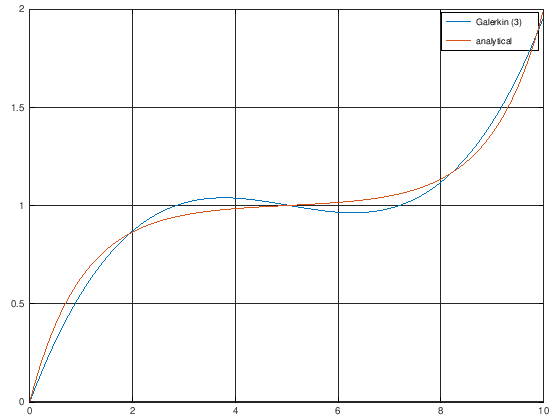

In [19]:
%% analytical solution
K=sqrt(k0/k);
C1=(T/k+(U-g/k0)*K*exp(K*L))/K/(exp(-K*L)+exp(K*L));
C2=U-C1-g/k0;
u_analytical=@(x)C1*exp(-K*x)+C2*exp(K*x)+g/k0;

figure(2)
plot(x_G,u_G(x_G)) % plot of the Galerkin solution
hold on
plot(x_G,u_analytical(x_G)) % plot of the analytical solution
legend('Galerkin (3)','analytical');
grid on

## Další úkoly:
1) Náš kód můžeme opět zobecnit a uvažovat bázi o libovoném počtu polynomů, tj. budeme hledat řešení ve tvaru
$ U+\alpha_1 \cdot x + \alpha_2 \cdot x^2 + \alpha_3 \cdot x^3 + \cdots $. <br> 
2) Volte nejprve $n=3$ a oveřte, že jste dostali stejné řešení. <br>
3) Volte vyšší hodnoty $n$ a zjistěte, zda se řešení zpřesňuje. <br>
4) Navrhněte i jiné způsoby, jak zjistit, zda se řešení zpřesňuje (jiné než vizuální posouzení).

   6.8820e-01
  -1.4584e-01
   9.6623e-03


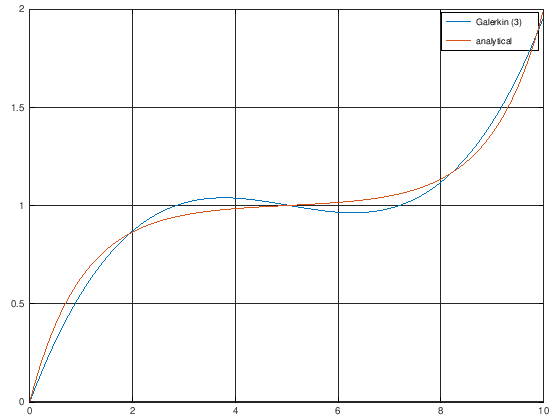

In [27]:
%% reseni Galerkinovou metodou
n=3;    % pocet polynomu x,x^2,...
A=zeros(n);
A0=zeros(n);
b=zeros(n,1);
for i=1:n
    for j=1:n
        A(i,j)=k*i*j/(i+j-1)*L^(i+j-1);
        A0(i,j)=k0/(i+j+1)*L^(i+j+1);
    end
    b(i)=g/(i+1)*L^(i+1)-T*L^i;
end
alfa=(A+A0)\b;
disp(alfa);

u_G=@(x)U;
for i=1:n
    u_G = @(x) u_G(x) + alfa(i)*x.^i;
end
x_G=linspace(0,L,100);    % points of visualization

figure(3)
plot(x_G,u_G(x_G)) % plot of the Galerkin solution
hold on
plot(x_G,u_analytical(x_G)) % plot of the analytical solution
legend('Galerkin (3)','analytical');
grid on